#### Dataset Validation. 
This notebook is to validate the dataset that has been created by auto-labeled images

- input: raw images with yolov5 format annotation
- validation: visually validating that annotation is accurate.

To test images, please update the `image_folder_path`, `annotation_folder_path` variables. 

In [25]:
# update folder path if not data/processed folder
image_folder_path = "../data/processed/validate/images" # on Windows c:data/processed/validate/images
annotation_folder_path = "../data/processed/validate/labels" # on Windows c:data/processed/validate/labels

In [16]:
#import cv2 as cv
#strange error ImportError: ERROR: recursion is detected during loading of "cv2" binary extensions. Check OpenCV installation.

In [26]:
#import cv2 as cv
import matplotlib.image as mpimg 
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        
    return images

def load_annotations_from_folder(folder):
    txt_files = filter(lambda x: x[-4:] == '.txt', os.listdir(folder))
    annotations = []
    for filename in txt_files:
        with open(os.path.join(folder,filename), 'r') as reader:
            annotations.append(reader.read().split())
            
    return annotations

In [27]:
os.listdir(image_folder_path) # c: current directory
## should see the list of images. If not please change. 

['bear_024.jpg',
 'bear_037.jpg',
 'bear_038.jpg',
 'bear_013.jpg',
 'bear_009.jpg',
 'bear_018.jpg',
 'bear_007.jpg']

In [28]:
images = load_images_from_folder(image_folder_path)

annotations = load_annotations_from_folder(annotation_folder_path)
# class_id, x_center, y_center, width, and the height 
# scaled from 0 to 1

annotations[0]

['0',
 '0.484375',
 '0.5177083333333333',
 '0.28750000000000003',
 '0.4270833333333333']

In [29]:
images[0].shape 
# notice that shape is height by width (not same order as annotations) 

(480, 640, 3)

#### Load images and annotation from the folder and display them for visualization

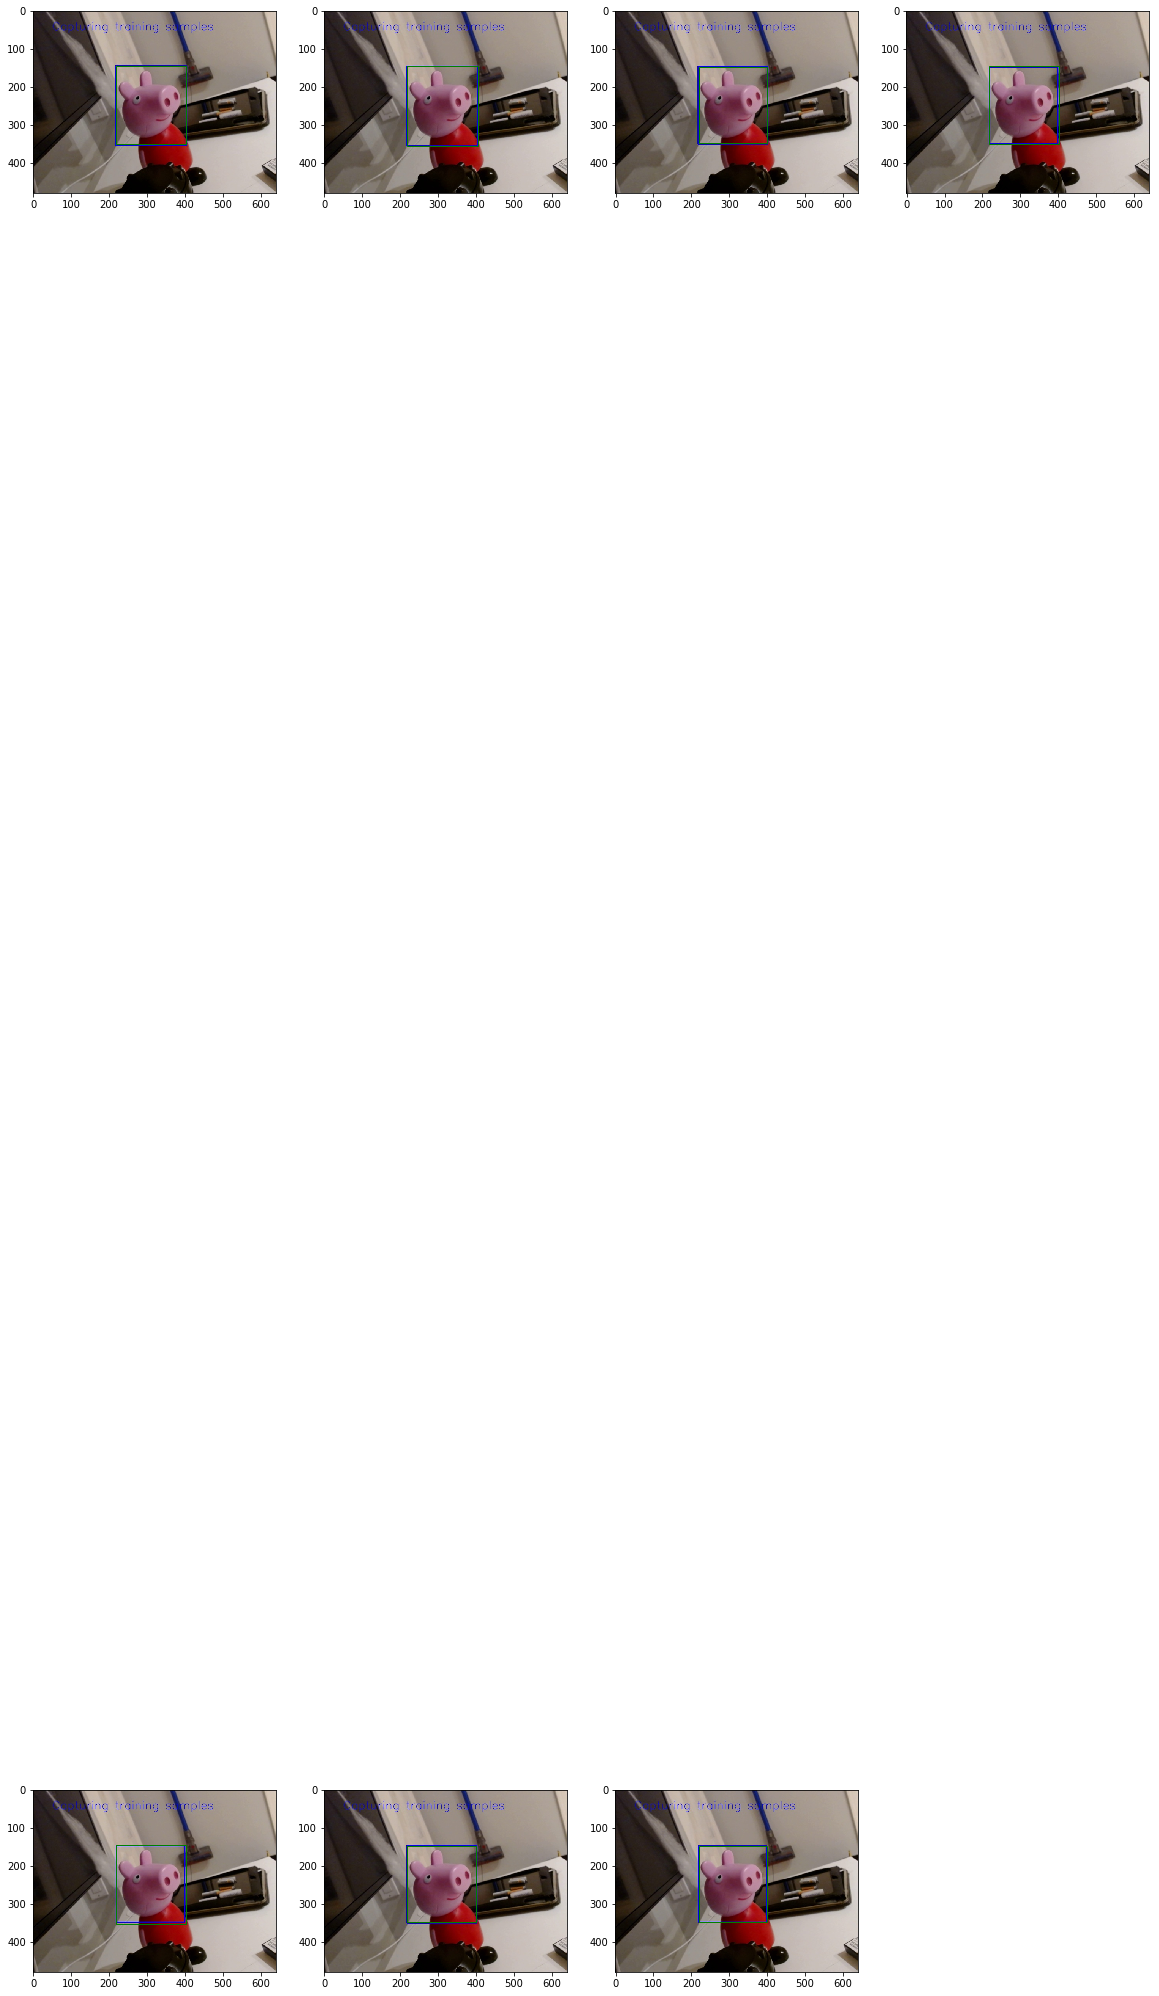

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches #to draw rectangle 

fig=plt.figure(figsize=(20, 60))
columns = 4
rows = math.ceil(len(images) / columns)

for i in range(1, len(images) + 1):
    ax = fig.add_subplot(rows, columns, i)
    img = images[i-1]
    plt.imshow(img)
    # Create a Rectangle patch
    # yolov5 annotation format: class_id, x_center, y_center, width, and the height 
    w = float(annotations[i-1][3])*img.shape[1]
    h = float(annotations[i-1][4])*img.shape[0]
    x = float(annotations[i-1][1])*img.shape[1] - w/2
    y = float(annotations[i-1][2])*img.shape[0] - h/2
    
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='green',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()